In [2]:
# import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load dataset
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [8]:
# To see the frequency of each value in the 'Cylinders' column
print(df['Cylinders'].value_counts())

Cylinders
4    1436
Name: count, dtype: int64


In [9]:
# Number of unique values in the 'Cylinders' column
print(df['Cylinders'].nunique())

1


In [10]:
# Drop cylinders because it has constant value ie is 4
df.drop(columns=['Cylinders'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
# 1. Summary statistics
print("Summary Statistics:\n")
print(df.describe())

Summary Statistics:

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min  

In [6]:
# 2. Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


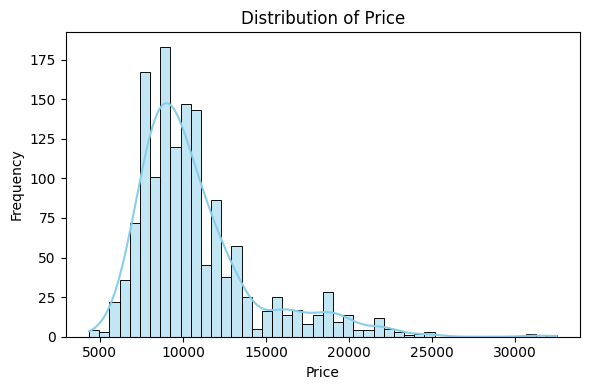

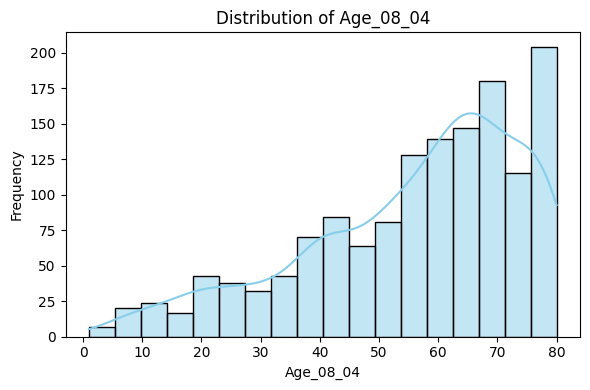

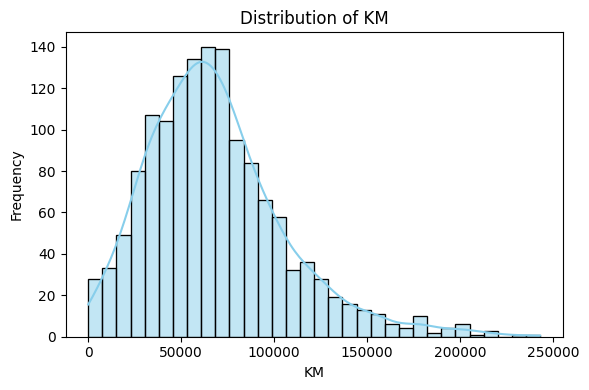

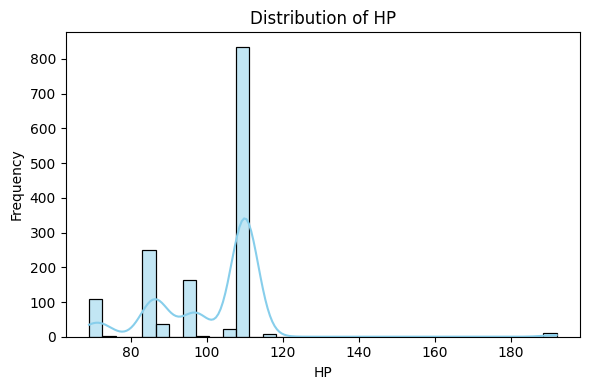

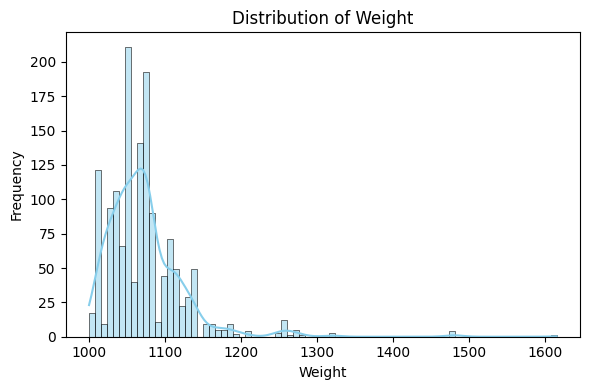

In [7]:
# 3. Plot distribution of key features
for col in ['Price', 'Age_08_04', 'KM', 'HP', 'Weight']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [9]:
# Convert 'Fuel_Type' to numeric (one-hot encoding)
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

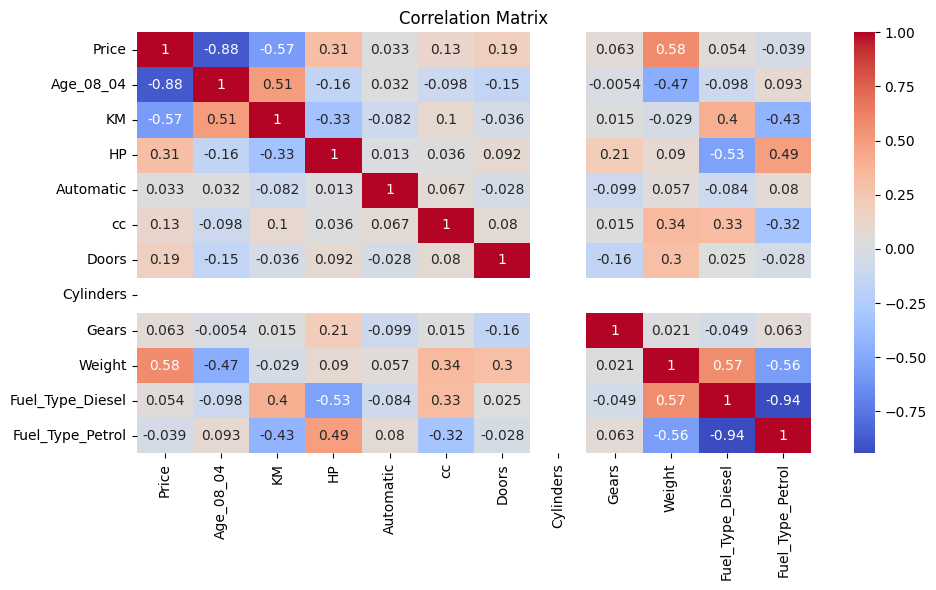

In [10]:
# 4. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [12]:
print(df.columns)


Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


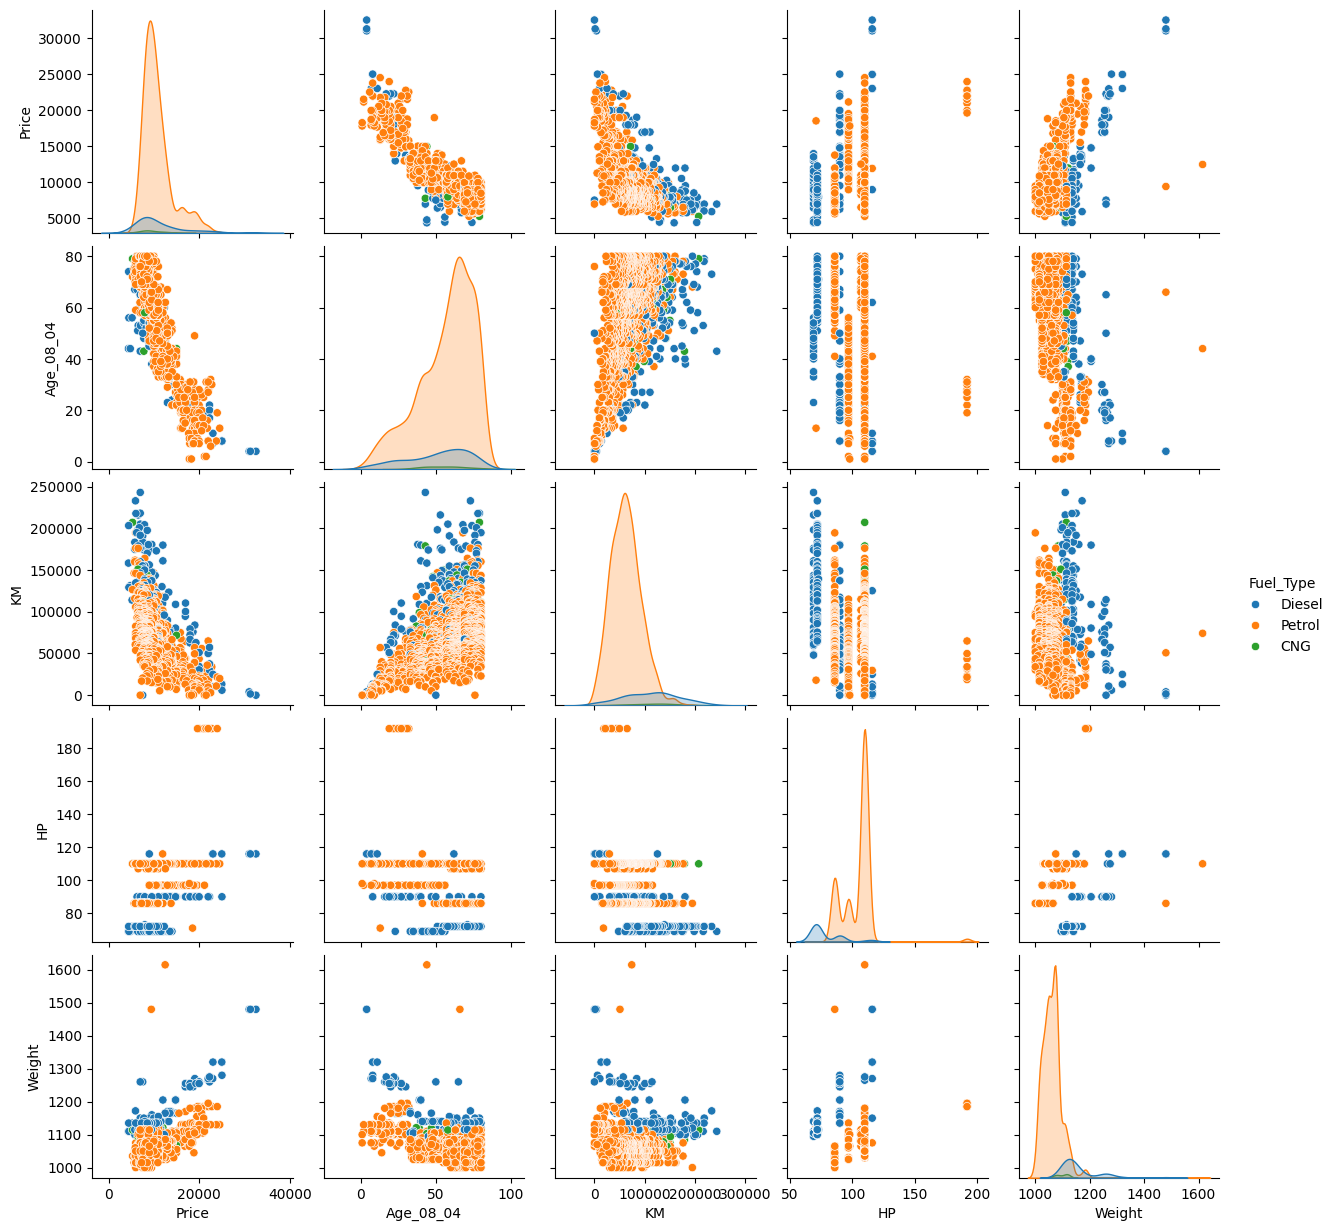

In [14]:
df_raw = pd.read_csv("ToyotaCorolla - MLR.csv")

# Merge Fuel_Type back into your current DataFrame
df['Fuel_Type'] = df_raw['Fuel_Type']

# Now this will work:
sns.pairplot(df, vars=['Price', 'Age_08_04', 'KM', 'HP', 'Weight'], hue='Fuel_Type')
plt.show()


In [15]:
# Convert 'Fuel_Type' to dummy variables (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# View the new column names
print(df_encoded.columns)

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


In [16]:
# Check correlation of all features with Price
correlation_matrix = df_encoded.corr()
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlation)

Price               1.000000
Weight              0.581198
HP                  0.314990
Doors               0.185326
cc                  0.126389
Gears               0.063104
Fuel_Type_Diesel    0.054084
Fuel_Type_Diesel    0.054084
Automatic           0.033081
Fuel_Type_Petrol   -0.038516
Fuel_Type_Petrol   -0.038516
KM                 -0.569960
Age_08_04          -0.876590
Cylinders                NaN
Name: Price, dtype: float64


In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   KM                1436 non-null   int64
 3   HP                1436 non-null   int64
 4   Automatic         1436 non-null   int64
 5   cc                1436 non-null   int64
 6   Doors             1436 non-null   int64
 7   Cylinders         1436 non-null   int64
 8   Gears             1436 non-null   int64
 9   Weight            1436 non-null   int64
 10  Fuel_Type_Diesel  1436 non-null   bool 
 11  Fuel_Type_Petrol  1436 non-null   bool 
 12  Fuel_Type_Diesel  1436 non-null   bool 
 13  Fuel_Type_Petrol  1436 non-null   bool 
dtypes: bool(4), int64(10)
memory usage: 117.9 KB


In [18]:
# dependent variable and indenpendent variable
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

In [19]:
# train , test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Model 1
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print("\nModel 1 Coefficients:")
print(pd.Series(model1.coef_, index=X.columns))


Model 1 Coefficients:
Age_08_04          -1.208305e+02
KM                 -1.623141e-02
HP                  1.403948e+01
Automatic           1.488309e+02
cc                 -3.037219e-02
Doors              -6.031097e+01
Cylinders           2.131628e-13
Gears               5.516007e+02
Weight              2.588496e+01
Fuel_Type_Diesel   -3.427438e+01
Fuel_Type_Petrol    6.854045e+02
Fuel_Type_Diesel   -3.427438e+01
Fuel_Type_Petrol    6.854045e+02
dtype: float64


In [21]:
# Model 2 – Drop Low Correlation Feature: cc
X2 = X.drop('cc', axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)

print("\nModel 2 Coefficients:")
print(pd.Series(model2.coef_, index=X2.columns))


Model 2 Coefficients:
Age_08_04          -1.208248e+02
KM                 -1.624126e-02
HP                  1.380545e+01
Automatic           1.420478e+02
Doors              -6.076219e+01
Cylinders           2.131628e-13
Gears               5.515618e+02
Weight              2.586885e+01
Fuel_Type_Diesel   -4.339305e+01
Fuel_Type_Petrol    6.852180e+02
Fuel_Type_Diesel   -4.339305e+01
Fuel_Type_Petrol    6.852180e+02
dtype: float64


In [22]:
# Model 3 – Top 5 Correlated Features with Price
top_features = df_encoded.corr()['Price'].abs().sort_values(ascending=False)[1:6].index.tolist()
X3 = df_encoded[top_features]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y_pred3 = model3.predict(X3_test)

print("\nModel 3 Coefficients:")
print(pd.Series(model3.coef_, index=X3.columns))



Model 3 Coefficients:
Age_08_04   -120.010417
Weight        19.880426
KM            -0.020242
HP            29.123289
Doors        -21.032162
dtype: float64


In [23]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"RMSE    : {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

# Evaluate all models
evaluate_model(y_test, y_pred1, "Model 1: All Features")
evaluate_model(y2_test, y_pred2, "Model 2: Dropped 'cc'")
evaluate_model(y3_test, y_pred3, "Model 3: Top 5 Features")


Model 1: All Features
R² Score: 0.8349
RMSE    : 1484.27

Model 2: Dropped 'cc'
R² Score: 0.8348
RMSE    : 1484.55

Model 3: Top 5 Features
R² Score: 0.8508
RMSE    : 1410.92


from above all models Model 1 has performed best because it has high r2 score and lower RMSE(Root Mean Square Error)

In [24]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
evaluate_model(y_test, ridge_pred, "Ridge Regression")

# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
evaluate_model(y_test, lasso_pred, "Lasso Regression")



Ridge Regression
R² Score: 0.8350
RMSE    : 1483.83

Lasso Regression
R² Score: 0.8355
RMSE    : 1481.68


In [25]:
# Comparission of all REMS values
results = {
    "Model 1": np.sqrt(mean_squared_error(y_test, y_pred1)),
    "Model 2": np.sqrt(mean_squared_error(y2_test, y_pred2)),
    "Model 3": np.sqrt(mean_squared_error(y3_test, y_pred3)),
    "Ridge": np.sqrt(mean_squared_error(y_test, ridge_pred)),
    "Lasso": np.sqrt(mean_squared_error(y_test, lasso_pred))
}
print("\nRMSE Comparison:")
print(pd.Series(results))


RMSE Comparison:
Model 1    1484.265415
Model 2    1484.545766
Model 3    1410.920899
Ridge      1483.829047
Lasso      1481.683924
dtype: float64


# Interview Questions

In [ ]:
# 1. What is Normalization & Standardization, and how is it helpful?
# Normalization is the process of scaling data to a fixed range, typically between 0 and 1.
# It is useful when features have different ranges or units and especially important in distance-based algorithms like k-NN, K-Means, or Neural Networks.

In [ ]:
# Standardization transforms features to have a mean of 0 and a standard deviation of 1.
# This is helpful for algorithms like Linear Regression, Ridge, Lasso, and PCA, where the scale of features matters.

In [ ]:
# It ensures that all features contribute equally to the model.

# It improves training performance, model accuracy, and convergence.

# It is essential when regularization is applied, as larger scale features can bias the penalty.



In [ ]:
# 2. What techniques can be used to address multicollinearity in Multiple Linear Regression?
# Multicollinearity occurs when two or more independent variables are highly correlated with each other.
# It can cause unstable model coefficients and make it hard to interpret which variable is truly affecting the outcome.

In [ ]:
# How to detect multicollinearity?
# Correlation matrix: Check for variables with high correlation (close to ±1).